In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.stats import probplot,boxcox
from sklearn.svm import SVR

In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [3]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [4]:
data_dir='C:/Users/yashc/Downloads'
train9=pd.read_csv(os.path.join(data_dir,'train9.csv'))
train1=pd.read_csv(os.path.join(data_dir,'train_KingofML','train1.csv') )  
des=pd.read_csv(os.path.join(data_dir,'train_KingofML','hero_data.csv') ) 
test1=pd.read_csv(os.path.join(data_dir,'test1.csv') )
test9=pd.read_csv(os.path.join(data_dir,'test9.csv') )
train=pd.concat([train9,train1],axis=0)
data=pd.concat([train1,train9,test9],axis=0)

In [5]:
sample=pd.read_csv('C:/Users/yashc/Downloads/sample_submission_CKEH6IJ.csv')

In [6]:
sample.head()

,id,kda_ratio
0,3_53,0
1,4_17,0
2,9_51,0
3,10_54,0
4,15_74,0


In [7]:
print train9.head(),'_'*75
print train1.head(),'_'*75
print test9.head(),'_'*75
print test1.head(),"_"*75


   user_id  hero_id     id  num_games  num_wins    kda_ratio
0        1       74   1_74        304       185  3743.699732
1        1       65   1_65        255       151  4009.021513
2        1       39   1_39        203       135  5094.621514
3        1      106  1_106        158       106  4619.212963
4        1        2    1_2        157        94  2871.627907 ___________________________________________________________________________
   user_id  hero_id     id  num_games  num_wins    kda_ratio
0        1       41   1_41        201       125  3731.707317
1        2       17   2_17        427       234  2922.058381
2        5      106  5_106        240       130  5116.682739
3        6       65   6_65        206       122  4131.553861
4        7       69   7_69        697       382  2474.469306 ___________________________________________________________________________
   user_id  hero_id     id  num_games  num_wins    kda_ratio
0        3       65   3_65        330       183  3418.4

In [8]:
des.head()

,hero_id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,agi,Melee,Carry:Escape:Nuker,200,1.50,75,0.9,-1.0,25,...,22,12,1.3,2.8,1.8,150,0,1.45,310,0.5
1,2,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,75,0.9,-1.0,25,...,20,18,2.8,2.2,1.6,150,900,1.70,290,0.6
2,3,int,Ranged,Support:Disabler:Nuker:Durable,200,1.50,75,0.9,1.0,25,...,23,23,2.4,2.4,2.4,400,900,1.70,310,0.6
3,4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator,200,1.50,75,0.9,0.0,25,...,24,18,2.7,3.0,1.7,150,900,1.70,285,0.5
4,5,int,Ranged,Support:Disabler:Nuker:Jungler,200,1.50,75,0.9,-1.0,25,...,16,16,2.0,1.6,2.9,600,900,1.70,275,0.5


In [9]:
des.drop(['roles','base_health','base_mana','base_magic_resistance'],axis=1,inplace=True)
for i in ['primary_attr','attack_type']:
    le=LabelEncoder()
    des[i]=le.fit_transform(des[i])

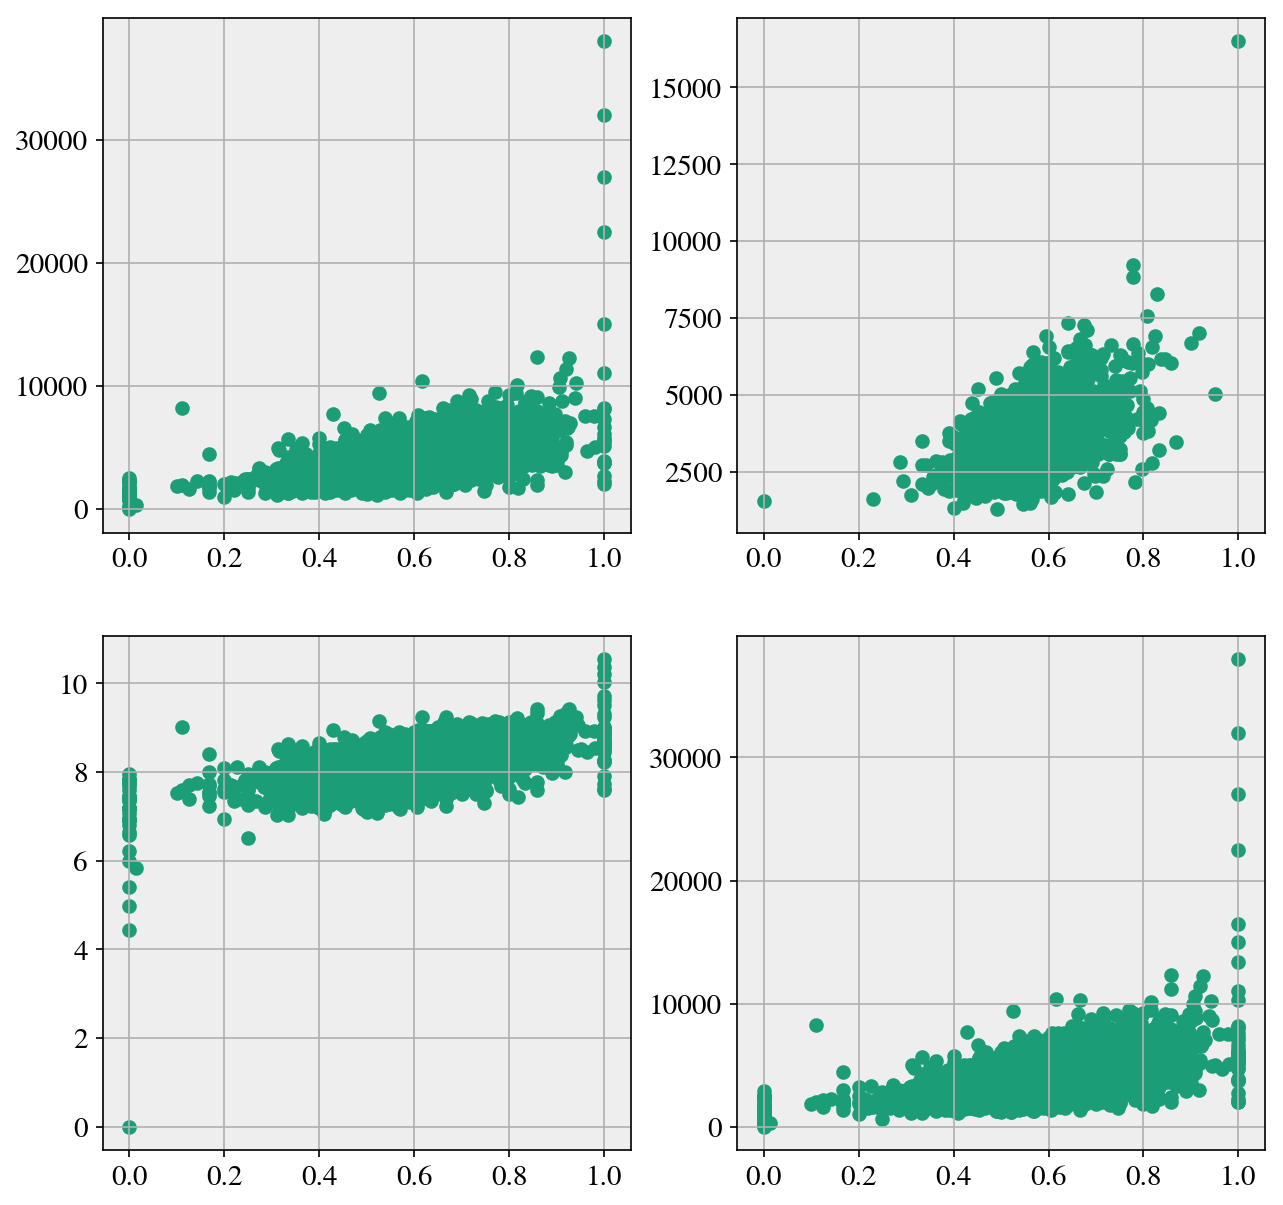

In [10]:
fig=plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(train9.num_wins/train9.num_games,train9.kda_ratio)#increasing kda_ratio with numwins/num games
plt.subplot(222)
plt.scatter(train1.num_wins/train1.num_games,train1.kda_ratio)
plt.subplot(223)
plt.scatter(data.num_wins/data.num_games,np.log1p(data.kda_ratio))
plt.subplot(224)
plt.scatter(data.num_wins/data.num_games,data.kda_ratio)

In [11]:
def normalizing(data,X):
    data[X][data[X] < 0]=0
    data[X][data[X] > data[X].quantile(0.99)] = data[X].quantile(0.99)
    data[X] = data[X].apply(lambda x: x+np.random.rand())
    
    data[X] = data[X].apply(lambda x: x+1)
    data[X], lambd= boxcox(data[X])
    return lambd
lambda_=normalizing(train,'kda_ratio')

In [12]:
test9['kda_ratio'][test9['kda_ratio'] < 0]=0
test9['kda_ratio'][test9['kda_ratio'] > test9['kda_ratio'].quantile(0.99)] = test9['kda_ratio'].quantile(0.99)
test9['kda_ratio'] =test9['kda_ratio'].apply(lambda x: x+np.random.rand())
test9['kda_ratio'] =test9['kda_ratio'].apply(lambda x: x+1)
test9['kda_ratio']= boxcox(test9['kda_ratio'],lambda_)

In [46]:
train1['kda_ratio'][train1['kda_ratio'] < 0]=0
train1['kda_ratio'][train1['kda_ratio'] > train1['kda_ratio'].quantile(0.99)] = train1['kda_ratio'].quantile(0.99)
train1['kda_ratio'] =train1['kda_ratio'].apply(lambda x: x+np.random.rand())
train1['kda_ratio'] =train1['kda_ratio'].apply(lambda x: x+1)
train1['kda_ratio']= boxcox(train1['kda_ratio'],lambda_)

0.0557444432882


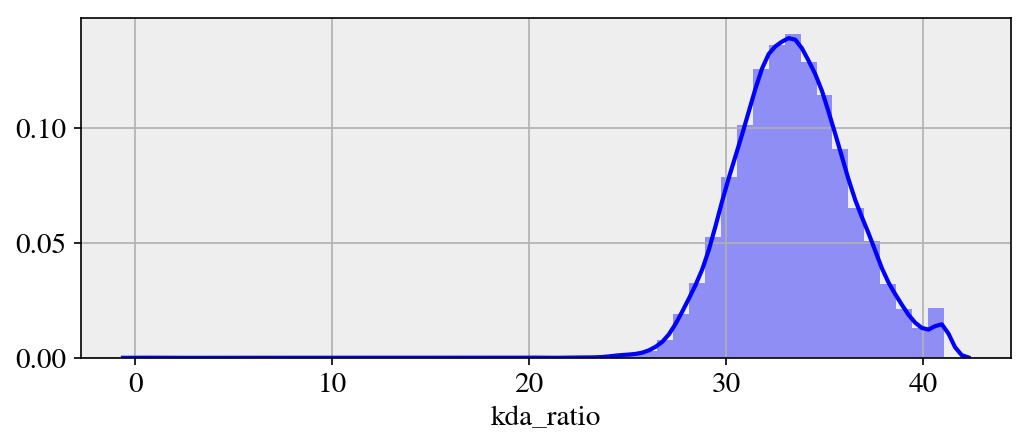

In [13]:
sns.distplot((train.kda_ratio),color='blue')
print (train.kda_ratio.skew())

0.0315461815478


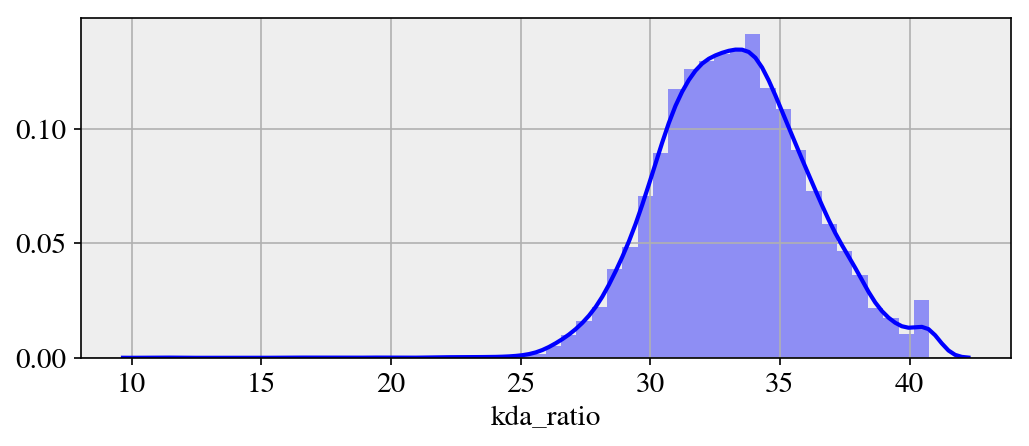

In [14]:
sns.distplot((test9.kda_ratio),color='blue')#after transformation
print (test9.kda_ratio.skew())

[[ 1.         0.9914135]
 [ 0.9914135  1.       ]]
[[ 1.          0.99152492]
 [ 0.99152492  1.        ]]


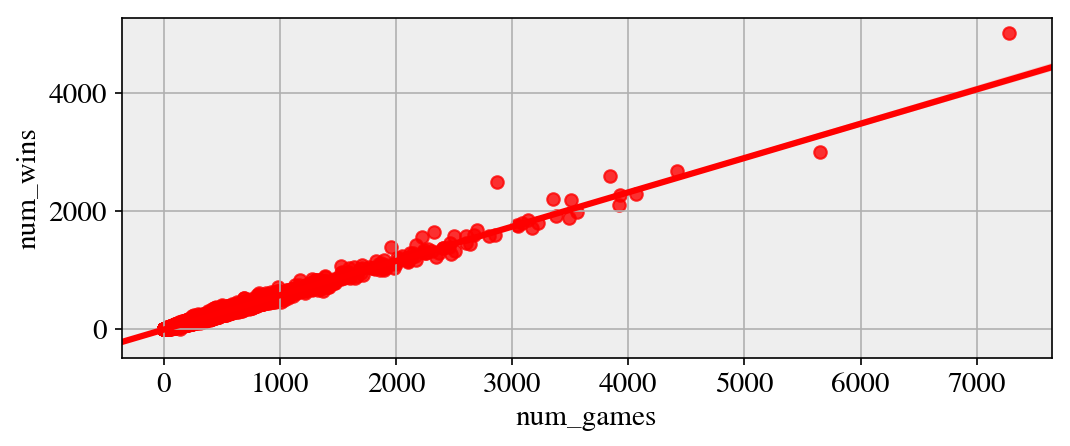

In [15]:
print np.corrcoef(train9.num_wins,train9.num_games)
print np.corrcoef(data.num_wins,data.num_games)
sns.regplot(data.num_games,data.num_wins,color='red')

In [16]:
xg=xgb.XGBRegressor()
xg.fit(data.num_games.reshape(-1,1),data.num_wins)
pred=xg.predict(test1.num_games.reshape(-1,1))
test1['num_wins']=pred

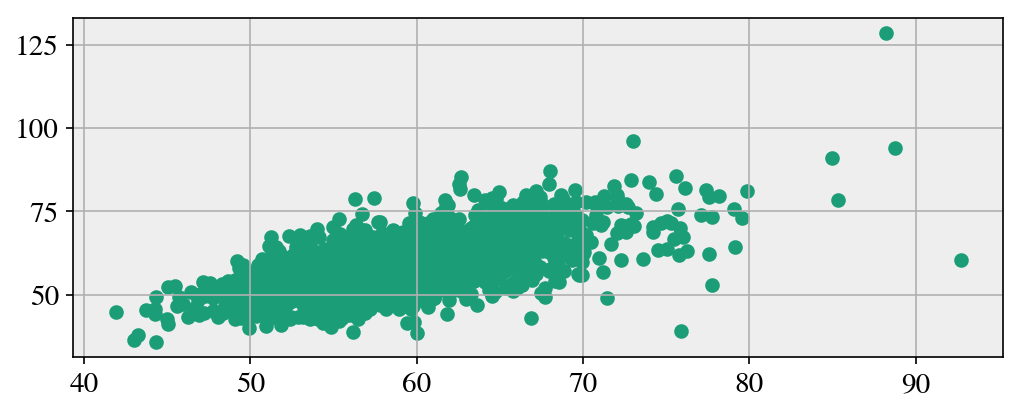

In [17]:
plt.scatter(np.sqrt(train9.groupby('user_id').kda_ratio.mean()),np.sqrt(train1.kda_ratio))

In [18]:
np.corrcoef(np.log1p(train9.groupby('user_id').kda_ratio.mean()),np.log1p(train1.kda_ratio))
#kda_ratiosurely depends onthe previous performance of individual users

array([[ 1.        ,  0.65455966],
       [ 0.65455966,  1.        ]])

In [19]:
def wins_pergame(dota):
    dota['wins/games']=dota.num_wins/dota.num_games
wins_pergame(train9)
wins_pergame(train1)
wins_pergame(test9)
wins_pergame(test1)
wins_pergame(train)

In [20]:
y_train=train['kda_ratio']
y_test=test9['kda_ratio']
train=train.drop('kda_ratio',axis=1)
train.drop('id',axis=1,inplace=True)
test=pd.concat([test9.drop('kda_ratio',axis=1),test1],axis=0)
test.drop('id',axis=1,inplace=True)
# train.drop('num_wins',axis=1,inplace=True)
# test.drop('num_wins',axis=1,inplace=True)

In [21]:
col=list(des.columns.values)
col.remove('hero_id')
def add_data(new):
    naya=new
    for i in col:
        naya[i]=0
        for j in np.unique(des.hero_id):
            naya.loc[naya.hero_id==j,i]=des[des.hero_id==j][i].values.tolist()[0]  
    return naya

In [22]:
# sc=StandardScaler()
# train['kda_ratio']=sc.fit_transform(train.kda_ratio.reshape(-1,1))
# test9['kda_ratio']=sc.fit_transform(test9.kda_ratio.reshape(-1,1))

In [23]:
train_new=add_data(train)
test_new=add_data(test)

((array([-3.98953814, -3.77393223, -3.65597758, ...,  3.65597758,
          3.77393223,  3.98953814]),
  array([ 0.47844015,  2.31279333,  2.65256962, ...,  3.73923698,
          3.73923703,  3.73923756])),
 (0.08504421115335474, 3.5349265821204328, 0.97113042073317823))

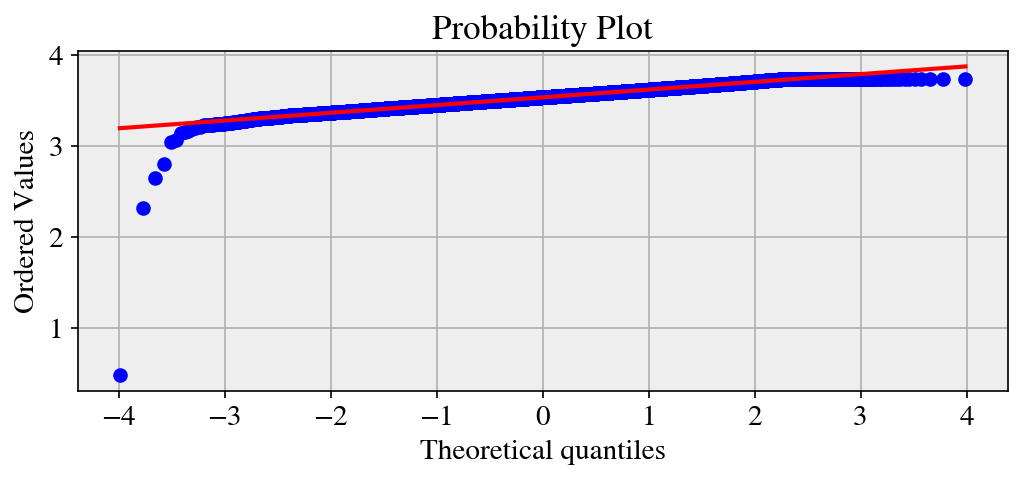

In [24]:
fig=plt.figure()
probplot(np.log1p(y_train),plot=plt)


In [25]:
X=train_new.drop('user_id',axis=1)
y=y_train
test_new9=test_new.iloc[0:test9.shape[0],:]
test_new1=test_new.iloc[test9.shape[0]:,:]
test_new9=test_new9.drop('user_id',axis=1)
test_new1=test_new1.drop('user_id',axis=1)

# rf=RandomForestRegressor(n_estimators=500,max_depth=5)
# print np.sqrt(-1*cross_val_score(rf,X,y,cv=10,scoring='neg_mean_squared_error')).mean()

In [26]:
test_new1.head()

,hero_id,num_games,num_wins,wins/games,primary_attr,attack_type,base_health_regen,base_mana_regen,base_armor,base_attack_min,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,53,278,155.492310,0.559325,1,1,1.5,0.9,1.0,30,...,18,25,2.1,1.9,2.90,600,1125,1.70,290,0.6
1,17,180,101.936684,0.566315,1,1,1.5,0.9,2.0,22,...,22,24,1.8,1.5,3.00,480,1100,1.70,285,0.8
2,51,70,39.937111,0.570530,2,0,1.5,0.9,0.0,28,...,13,17,3.2,2.3,1.30,150,900,1.70,315,0.6
3,54,189,104.863243,0.554832,2,0,1.5,0.9,-1.0,27,...,18,15,3.1,1.9,1.75,150,900,1.85,315,1.0
4,74,263,147.683197,0.561533,1,1,1.5,0.9,-1.0,19,...,14,16,2.2,1.9,4.00,600,900,1.70,280,0.5


In [27]:
pca=PCA(n_components=2)
trans=pca.fit_transform(X.loc[:,'base_health_regen':'turn_rate'])
X['new1']=trans[:,0]
X['new2']=trans[:,1]
#X['new3']=trans[:,2]
X=X[['hero_id','num_games','num_wins','wins/games','primary_attr','attack_type','new1','new2']]
trans_test9=pca.fit_transform(test_new9.loc[:,'base_health_regen':'turn_rate'])
test_new9['new1']=trans_test9[:,0]
test_new9['new2']=trans_test9[:,1]
#test_new9['new3']=trans_test9[:,2]
test_new9=test_new9[['hero_id','num_games','num_wins','wins/games','primary_attr','attack_type','new1','new2']]
trans_test1=pca.fit_transform(test_new1.loc[:,'base_health_regen':'turn_rate'])
test_new1['new1']=trans_test1[:,0]
test_new1['new2']=trans_test1[:,1]
#test_new1['new3']=trans_test1[:,2]
test_new1=test_new1[['hero_id','num_games','num_wins','wins/games','primary_attr','attack_type','new1','new2']]
X['kda_ratio']=y_train
test_new9['kda_ratio']=y_test
test_final=pd.concat([test_new9,test_new1],axis=0)

In [28]:
conti=['num_games','num_wins','new1','new2']
def scale(data):
    for i in conti:
        sc=StandardScaler()
        data[i]=sc.fit_transform(data[i].reshape(-1,1))
scale(X)
scale(test_final)

In [54]:
test_final=test_final[X.columns.values]

In [59]:
train_over=pd.concat([X,test_final[0:test_new9.shape[0]]],axis=0)

In [60]:
train_over_y=train_over['kda_ratio']
train_over.drop('kda_ratio',inplace=True)
test_1_wala=test_final[test_new9.shape[0]:]

In [29]:
final_Data=pd.DataFrame()
for i in np.unique(train_new.user_id):
    a=X[train_new.user_id==i][['hero_id','num_games','num_wins','wins/games','primary_attr','attack_type','new1','new2']].values.flatten()
    new_data=pd.DataFrame({str(i):a})
    new_data=new_data.T
    final_Data=pd.concat([final_Data,new_data],axis=0)

In [30]:
final_Data_test=pd.DataFrame()
for i in np.unique(test_new.user_id):
    b=test_final[test_new.user_id==i][['hero_id','num_games','num_wins','wins/games','primary_attr','attack_type','new1','new2']].values.flatten()
    new_data_test=pd.DataFrame({str(i):b})
    new_data_test=new_data_test.T
    final_Data_test=pd.concat([final_Data_test,new_data_test],axis=0)

In [31]:
final_Data_test.drop(79,axis=1,inplace=True)
final_Data.drop(79,axis=1,inplace=True)

In [232]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.1, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor()
model_xgb = xgb.XGBRegressor(n_estimators=500)
rf=RandomForestRegressor()
#model_xgb.fit(final_Data,train1.kda_ratio)
#np.sqrt(mean_squared_error(y_test,model_xgb.predict(test_new9)))

In [61]:
model_x= xgb.XGBRegressor(n_estimators=500)

In [ ]:
param={'gamma':[0.05,.07,.1,.3,.7],'max_depth'=[3,5,7,9],'min_child_weight'=[1,3]}
gs=GridSearchCV(model_xgb,param_grid=param,cv=10,scoring='neg_mean_squared_error')

In [71]:
model_x.fit(train_over,data.kda_ratio)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=500,
       nthread=-1, objective='reg:linear', seed=0, silent=True,
       subsample=1)

In [72]:
y_box=model_x.predict(test_1_wala)
#pred_y = np.power((y_box * lambda_) + 1, 1 / lambda_) -1
sub=pd.DataFrame({'id':test1.id,'kda_ratio':y_box})
sub.set_index('id',inplace=True)
sub.to_csv('C:/Users/yashc/Desktop/kingsofML.csv')

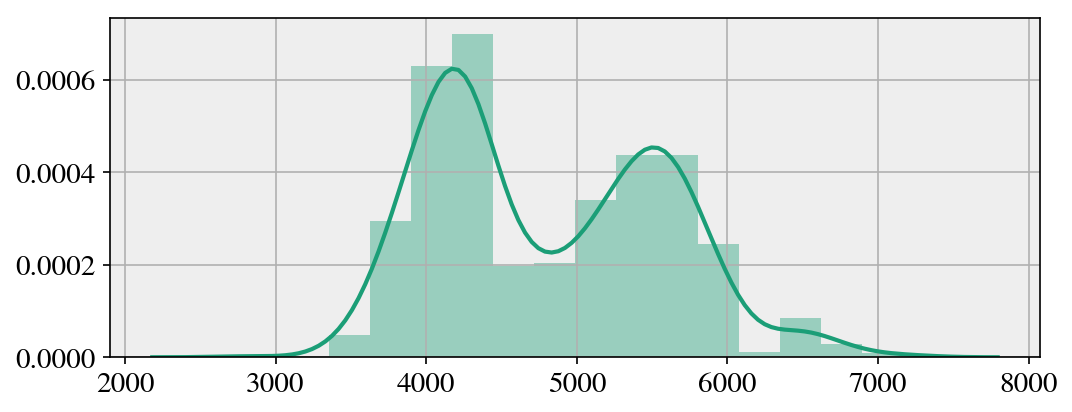

In [74]:
sns.distplot(y_box)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

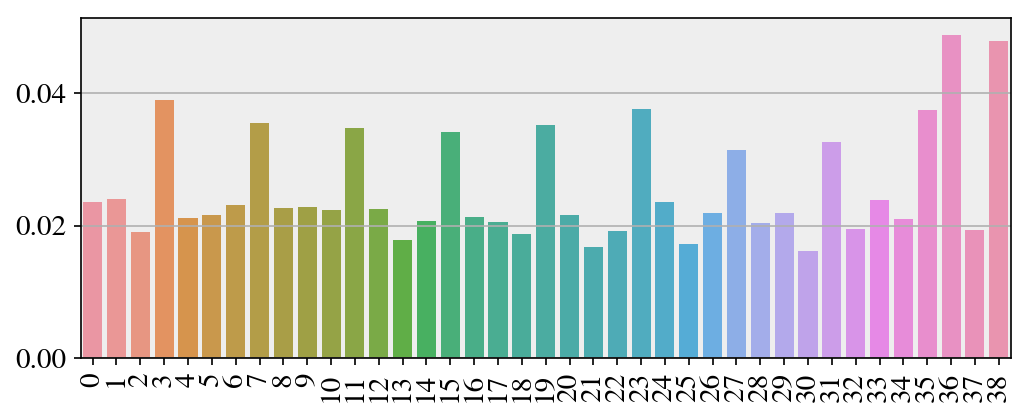

In [160]:
sns.barplot(final_Data.columns.values,GBoost.feature_importances_)
plt.xticks(rotation=90)

In [117]:
y0=pd.DataFrame({"y":y})
y1=pd.DataFrame({'y':y_test})
y2=pd.concat([y0,y1],axis=0)

In [119]:
y2.shape

(29022, 1)